In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Cancer Prediction**

In [79]:
file_path = '/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv'
df = pd.read_csv(file_path)
print(df.shape)
df.describe().T
binary_features = ['Gender', 'Smoking', 'CancerHistory', 'Diagnosis']
continuous_features = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_features = ['GeneticRisk']

(1500, 9)


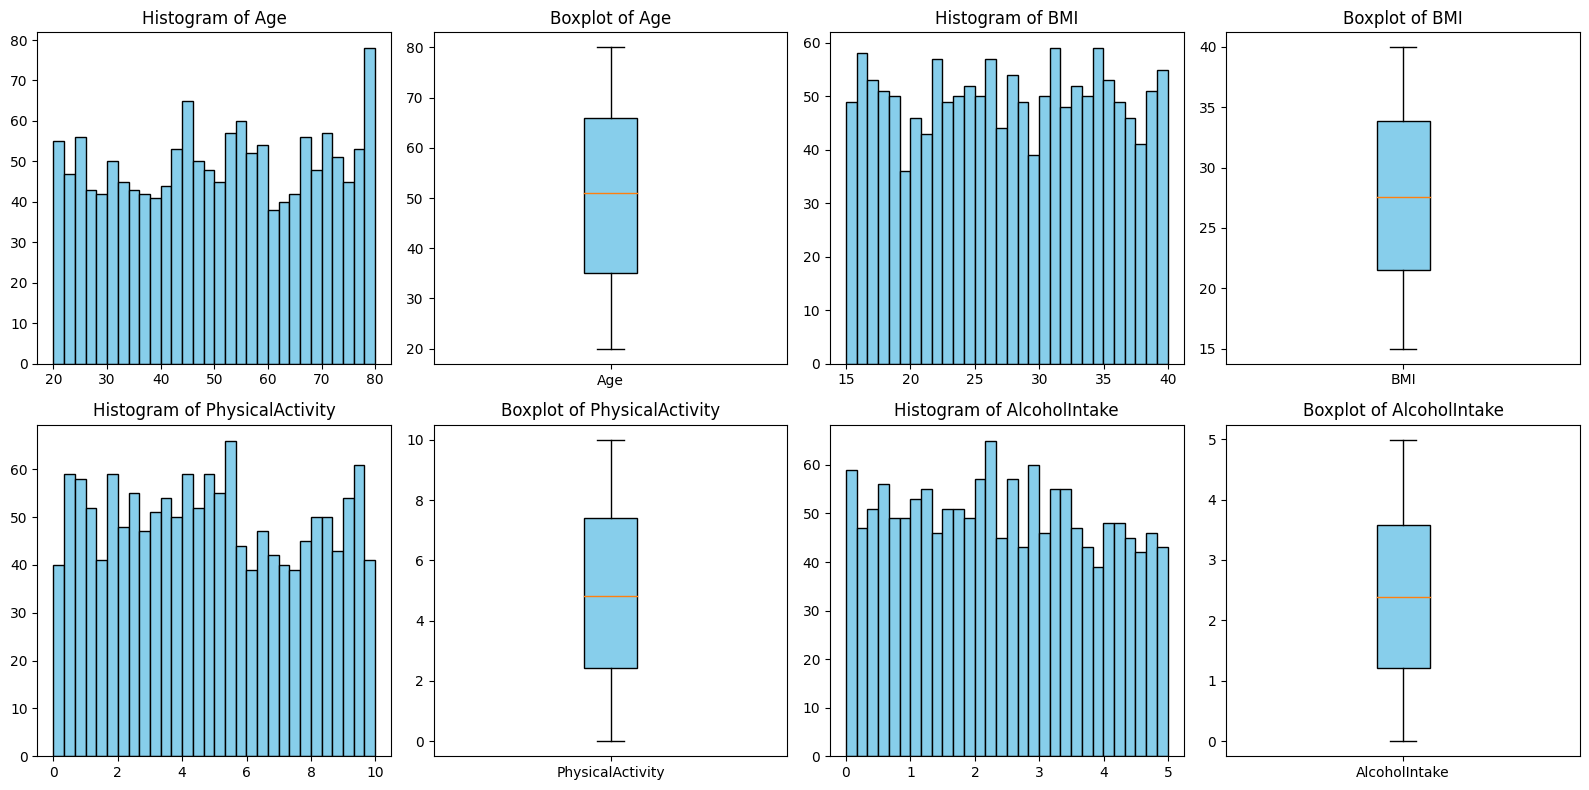

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, feature in enumerate(continuous_features):
    # Histogram
    ax_hist = axes[i // 2, (i % 2) * 2]
    ax_hist.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax_hist.set_title(f'Histogram of {feature}')
    
    # Boxplot
    ax_box = axes[i // 2, (i % 2) * 2 + 1]
    ax_box.boxplot(df[feature].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    ax_box.set_title(f'Boxplot of {feature}')
    ax_box.set_xticks([1])
    ax_box.set_xticklabels([feature])

plt.tight_layout()
plt.show()

In [32]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

class_report_rf = classification_report(y_test, y_pred)
print("\nClassification Report (Random Forest):\n", class_report_rf)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       275
           1       0.94      0.86      0.90       175

    accuracy                           0.92       450
   macro avg       0.93      0.91      0.92       450
weighted avg       0.93      0.92      0.92       450

Accuracy: 0.92
Confusion Matrix:
[[266   9]
 [ 25 150]]


# **Breast Cancer Prediction**

In [80]:
file_path = '/kaggle/input/breast-cancer-prediction/breast-cancer-dataset.csv'
df = pd.read_csv(file_path)
print(df.shape)

(213, 11)


In [35]:
object_columns = df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

for col in object_columns:
    df[col] = encoder.fit_transform(df[[col]])

In [36]:
X = df.drop(columns=['Diagnosis Result'])
y = df['Diagnosis Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [37]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision (Random Forest):", precision_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall (Random Forest):", recall_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score (Random Forest):", f1_rf)


Confusion Matrix (Random Forest):
[[26  0]
 [ 4 13]]

Accuracy (Random Forest): 0.9069767441860465
Precision (Random Forest): 1.0
Recall (Random Forest): 0.7647058823529411
F1 Score (Random Forest): 0.8666666666666666


# **Kidney Disease Prediction**

In [81]:
df= pd.read_csv('../input/ckdisease/kidney_disease.csv')
df.drop('id', axis = 1, inplace = True)
print(df.shape)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

(400, 25)


In [39]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

/tmp/ipykernel_37/2051021067.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


/tmp/ipykernel_37/1838127714.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_37/1838127714.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide

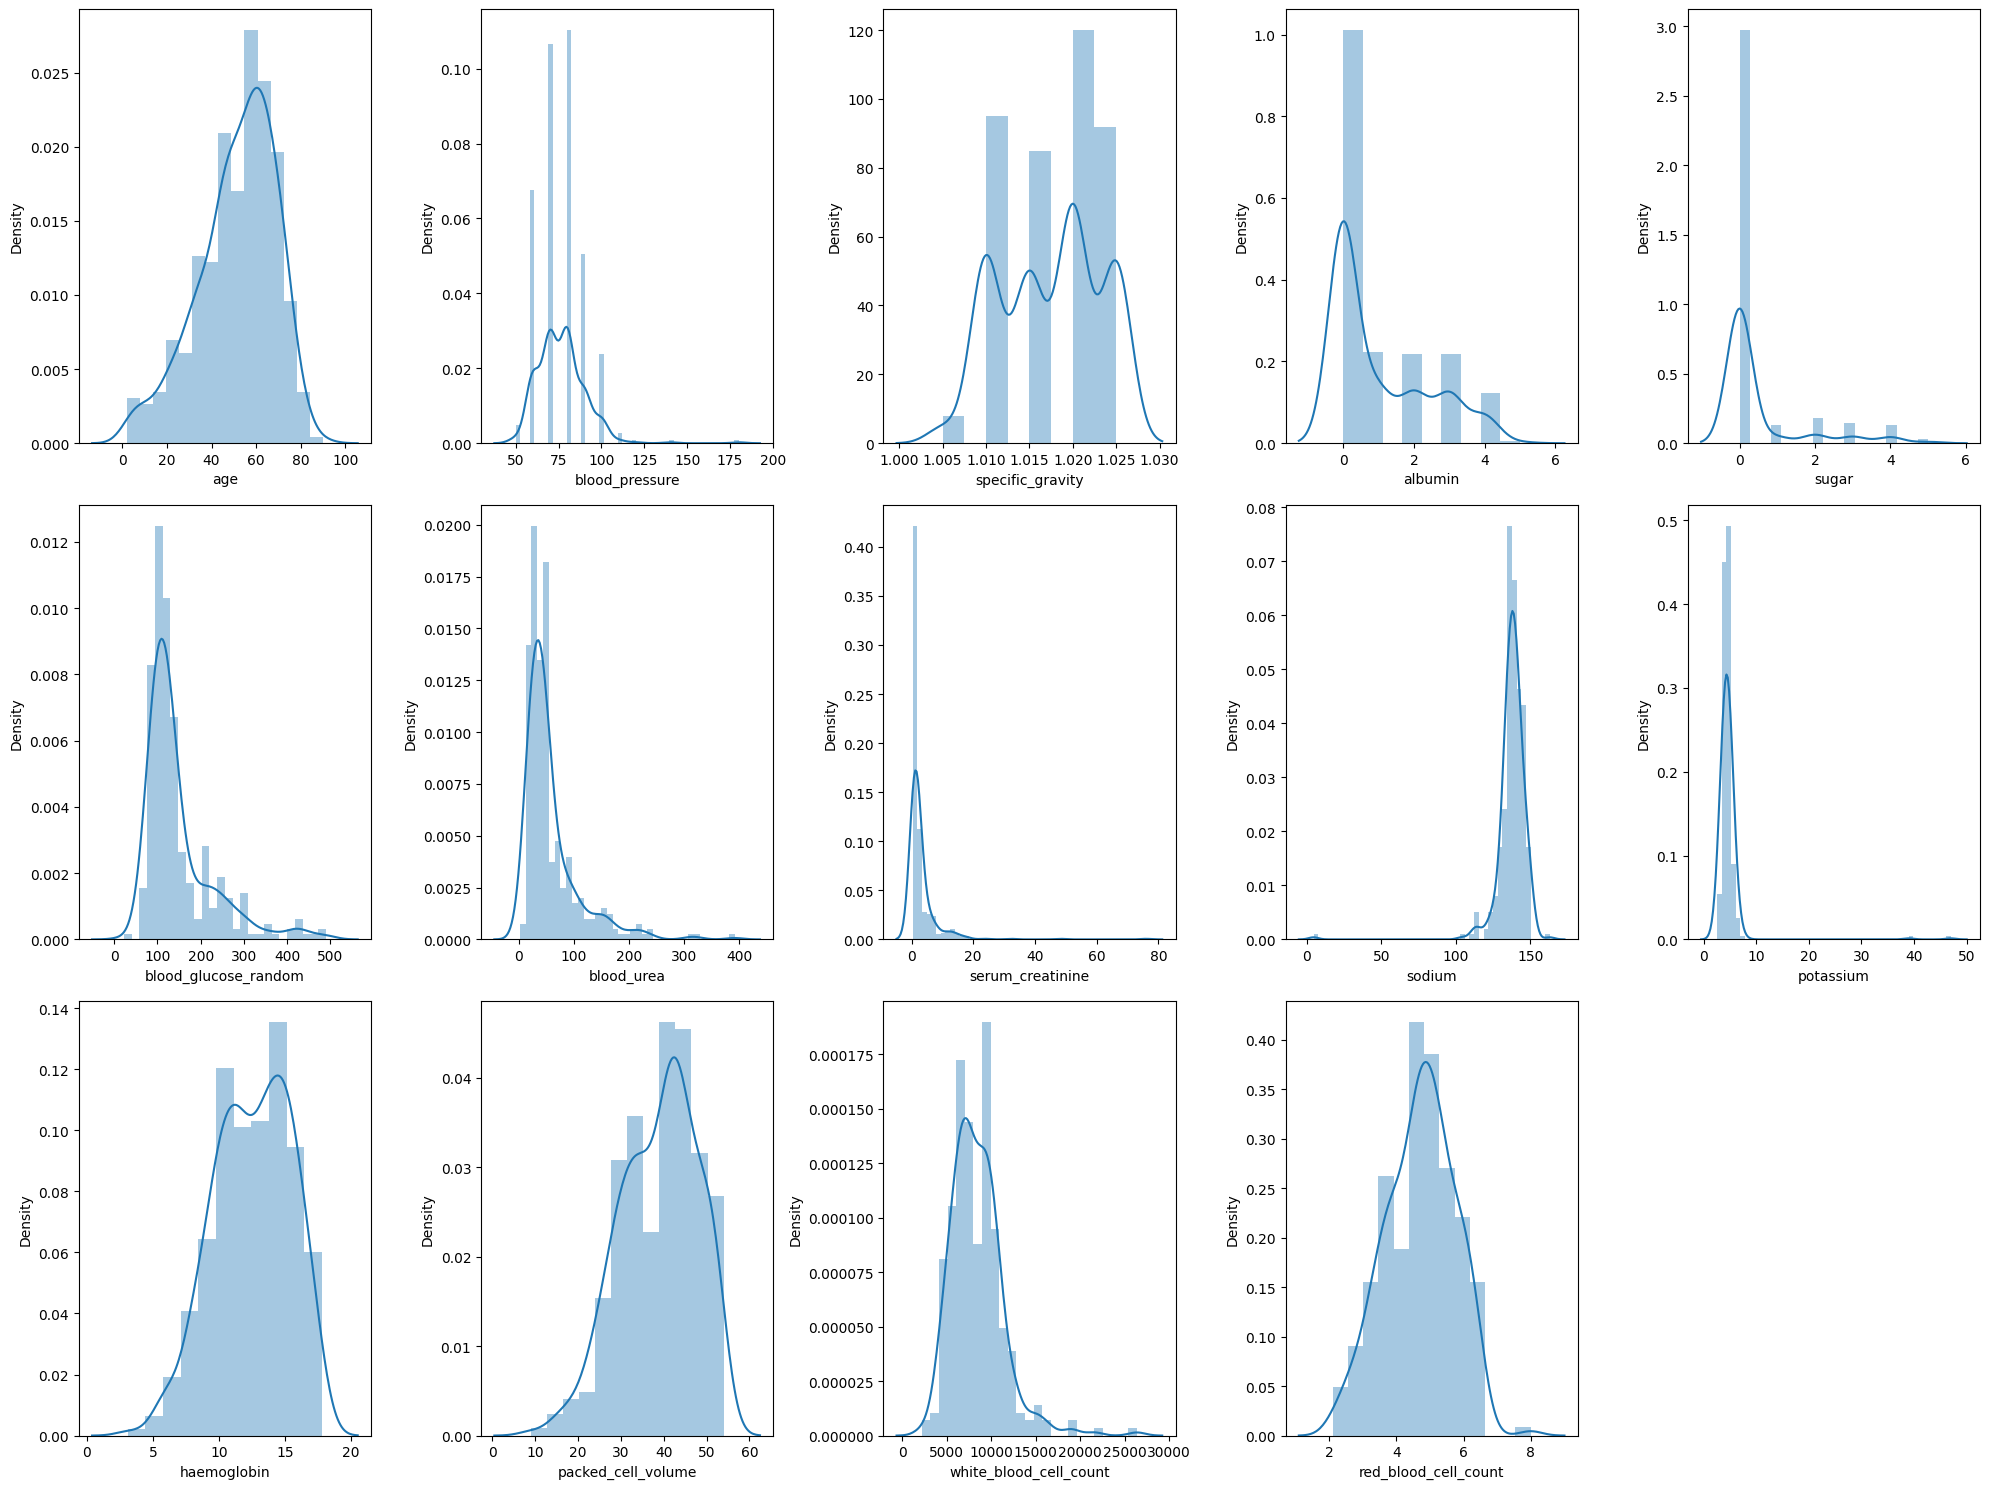

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

import seaborn as sns
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [45]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



# **Diabetes Prediction**

In [82]:
df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')
print(df.shape)

(768, 9)


In [51]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = imputer.fit_transform(df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

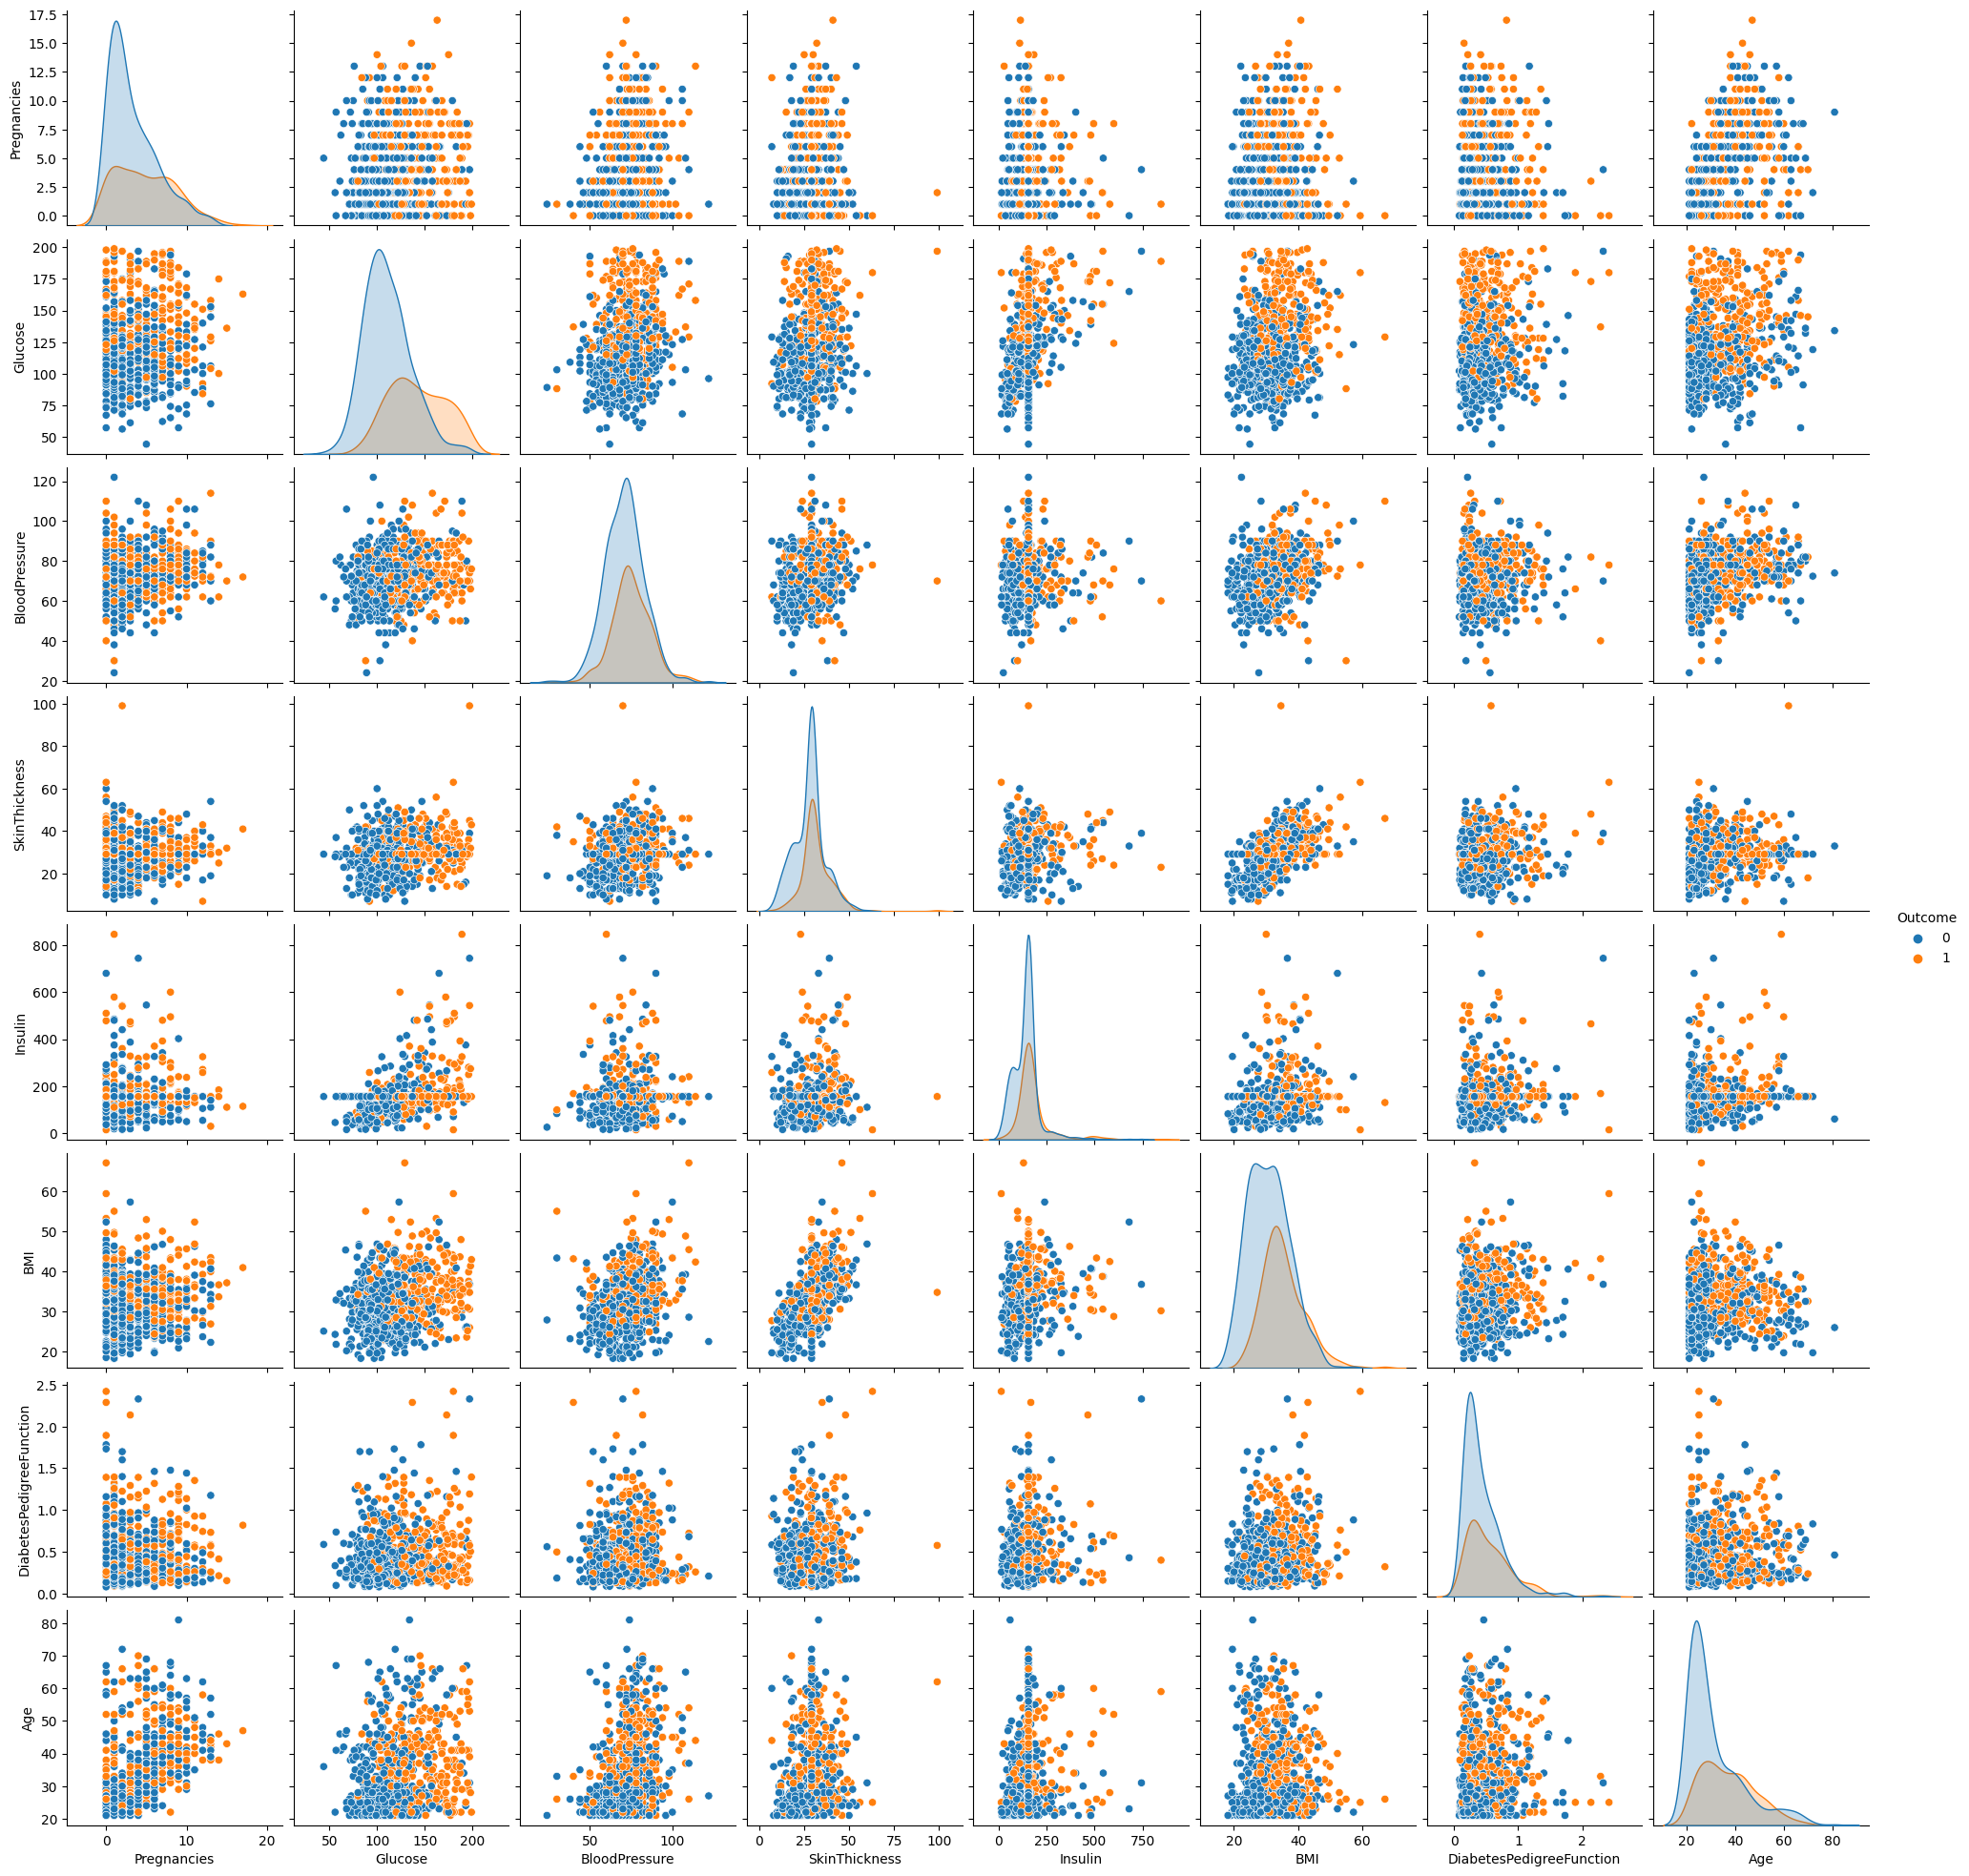

In [52]:
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

In [58]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = df['Outcome'] )

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.71
Confusion Matrix:
[[81 19]
 [26 28]]


# **Cardiovascular Disease Prediction**

In [83]:
df = pd.read_csv("/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv")
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df = df.drop_duplicates()
print(df.shape)

(308774, 19)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


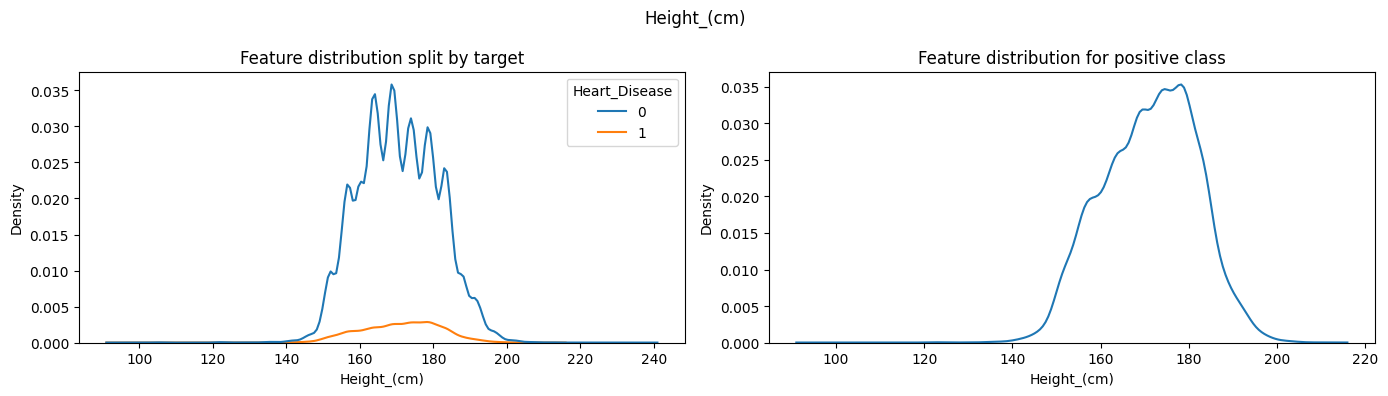

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


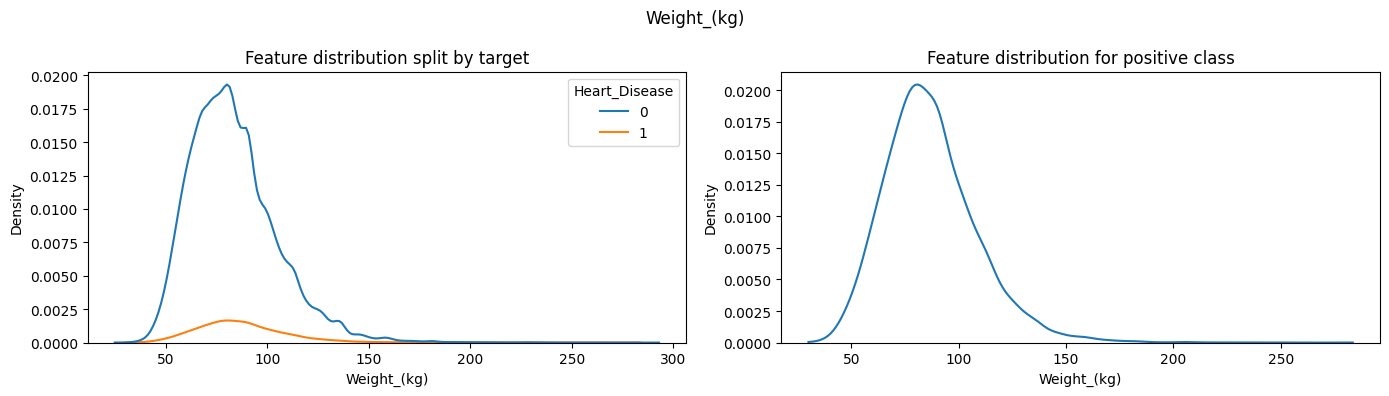

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


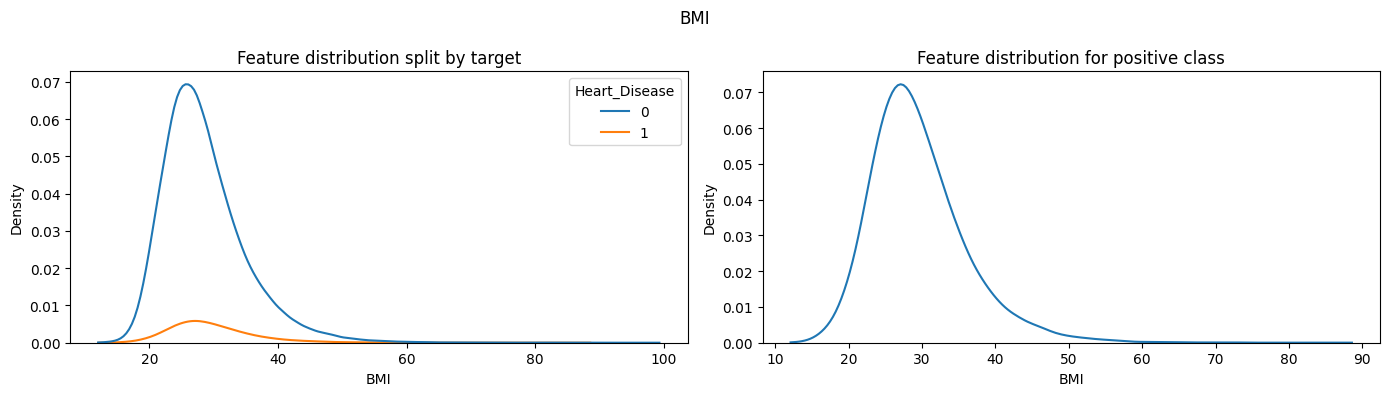

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


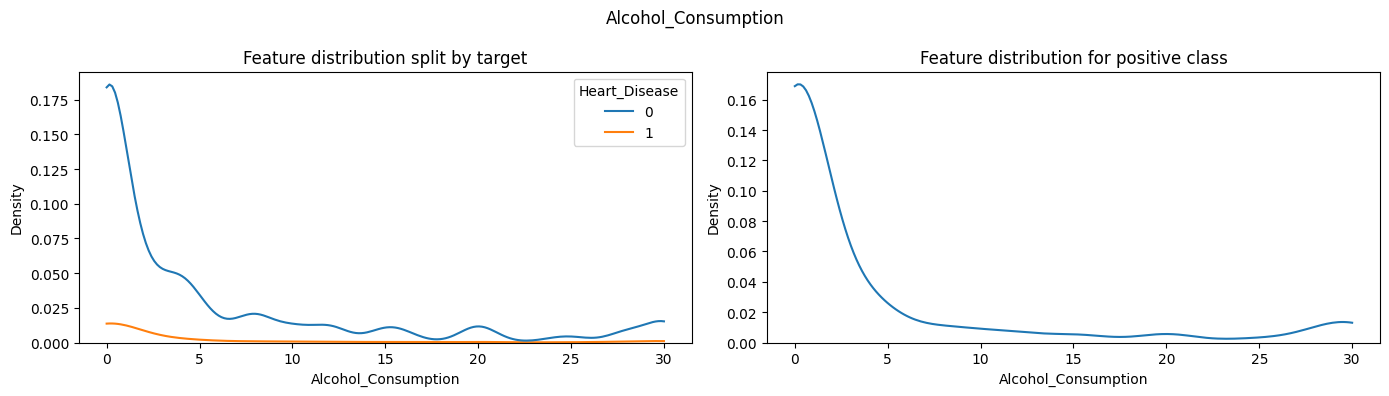

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


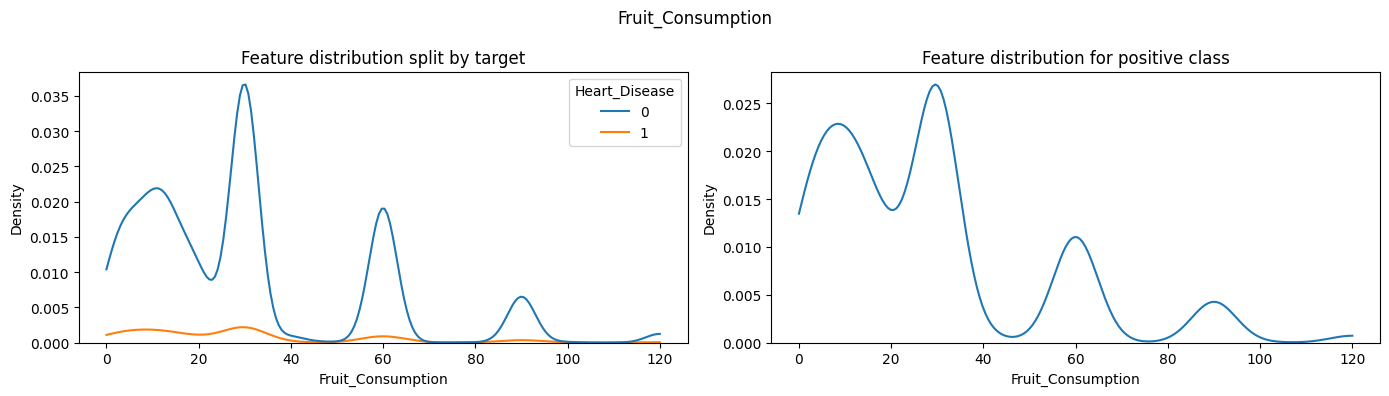

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


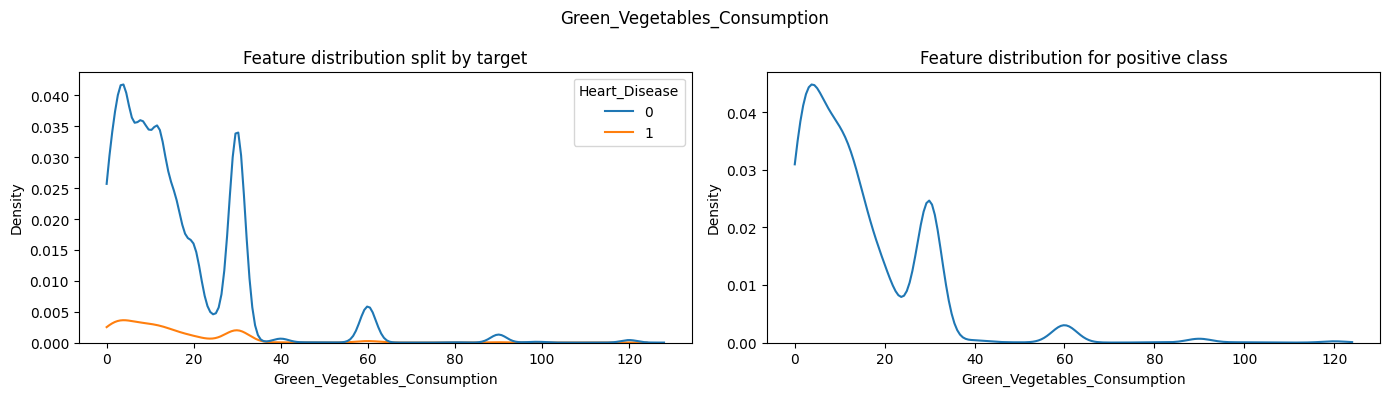

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


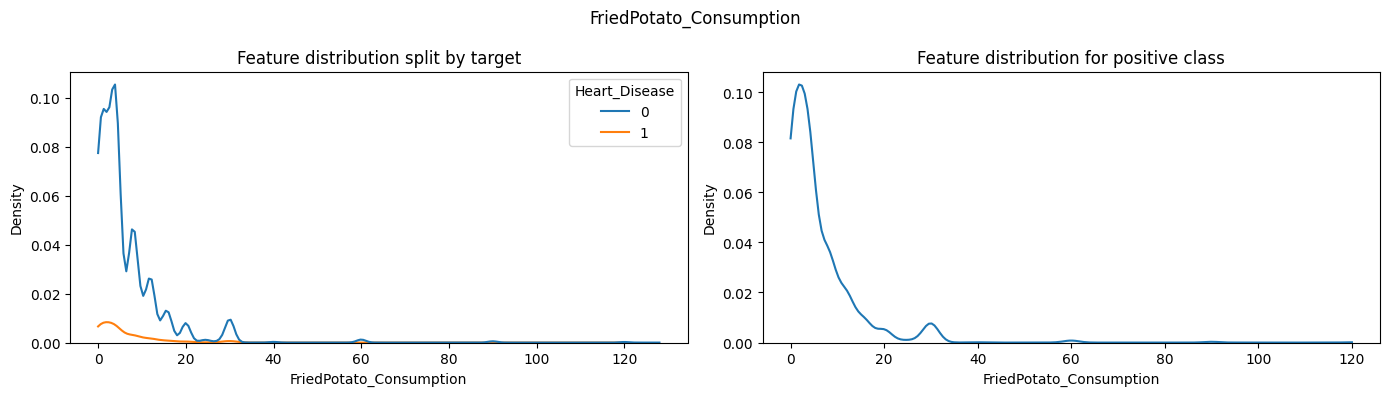

In [72]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 
                      'Alcohol_Consumption', 'Fruit_Consumption', 
                      'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
TARGET = 'Heart_Disease'

def plot_numerical(f, dataset):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    plt.suptitle(f'{f}')
    ax[0].set_title('Feature distribution split by target')
    sns.kdeplot(data=dataset, x=f, hue=TARGET, cut=0, bw_adjust=1.5, ax=ax[0])
    ax[1].set_title('Feature distribution for positive class')
    sns.kdeplot(data=dataset[dataset[TARGET]==1], x=f, cut=0, bw_adjust=1.5, ax=ax[1])
    
    fig.tight_layout()
    plt.show()

for feature in numerical_features:
    plot_numerical(feature, df)

In [75]:
X = df.drop(TARGET, axis=1)
y = df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)  # Adjust max_iter if the model doesn't converge
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.92
Confusion Matrix:
[[84881   219]
 [ 7321   212]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85100
           1       0.49      0.03      0.05      7533

    accuracy                           0.92     92633
   macro avg       0.71      0.51      0.51     92633
weighted avg       0.89      0.92      0.88     92633

